# Homework 4 for Computer Vision course

Student : Stanca Robert-Gabriel - ISI

# Tasks:
1.Download 10 images with human faces from the web.

2.Threshold the image based on a certain hue range, in order to get regions containing human skin.

3.Remove the smallest, noisy connected components.

4.Dilate and erode the remaining blobs.

5.Compute regions properties of the remaining blobs (center and main axes) and keep the sufficiently round ones in order to obtain human faces. Fit ellipses to those blobs and show them.

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys,os

%matplotlib inline

In [2]:
path = "C:\\Users\\roby\\Desktop\\master\\CV\\TEMA4\\input"
files = os.listdir(path)
print("Found " + str(len(files)) + " images.")

Found 4 images.


# Rules for detection

In [3]:
def rule1(r,g,b):
    eq1 = ((r>95) & (g>40) & (b>20) & 
           (((np.maximum(r,np.maximum(g,b)))-np.minimum(r,np.minimum(g,b)))>15) & (abs(r-g)>15) & (r>g))
    #eq2 = (r>220) & (g>170) & (abs(r-g)<=15) & (r>b) & (g<b)
    return eq1#(eq1 | eq2)
    
def rule2(y,Cb,Cr):
    eq6= Cr > 135
    eq7= Cb > 85
    eq8= y > 80
    eq1= Cr <= (1.5862*Cb+20)
    eq2= Cr >= (0.3448*Cb+76.2069)
    eq3= Cr >= (-4.5652*Cb+234.5652)
    eq4= Cr <= (-1.15*Cb+301.75)
    eq5= Cr <= (-2.2857*Cb + 432.85)
    
    return (eq1 & eq2 & eq3 & eq4 & eq5 &eq7 &eq8 &eq6)

def rule3(H,S,V):
    return ((H>=100) & (S<=173) & (S>=58))
    


# Erode and dilate functions

In [4]:
def erode(binImg, mat):
    
    width, height = binImg.shape
    newImg = np.zeros((width, height))
    
    for i in range(len(mat),width-len(mat)):
        for j in range(len(mat),height-len(mat)):
            s = sum(sum(binImg[i:i+len(mat),j:j+len(mat)] * mat))
            newImg[i,j] = (s > 2)
            
    return newImg

def dilate(binImg, mat):
    
    width, height = binImg.shape
    newImg = np.zeros((width, height))
    
    for i in range(len(mat),width-len(mat)):
        for j in range(len(mat),height-len(mat)):
            s = sum(sum(binImg[i:i+len(mat),j:j+len(mat)] * mat))
            newImg[i,j] = (s > 1)
            
    return newImg
    

C:\Users\roby\Desktop\master\CV\TEMA4\input\p1.jpg


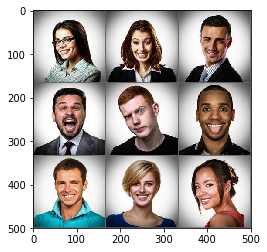

(500, 500, 3)


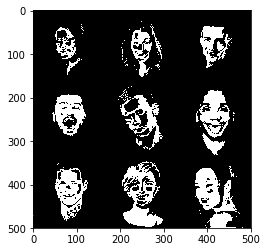

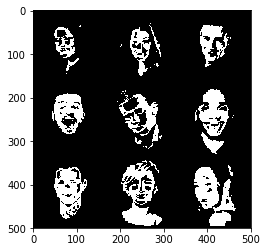

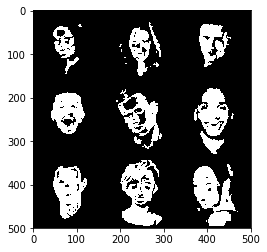

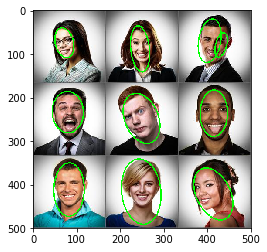

C:\Users\roby\Desktop\master\CV\TEMA4\input\p2.jpg


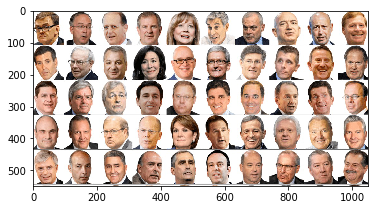

(549, 1050, 3)


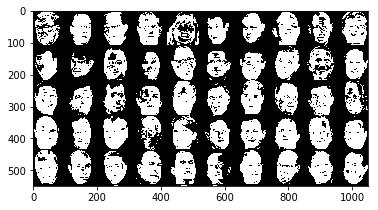

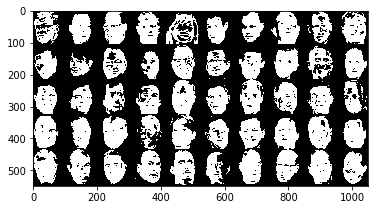

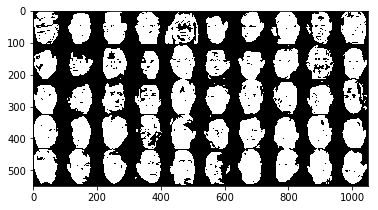

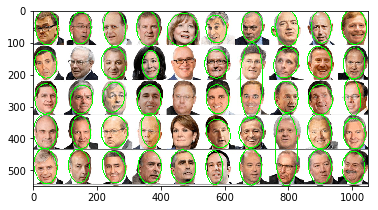

C:\Users\roby\Desktop\master\CV\TEMA4\input\p7.jpg


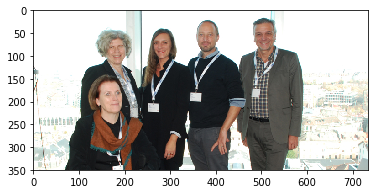

(350, 734, 3)


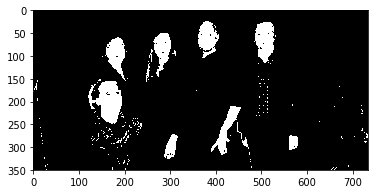

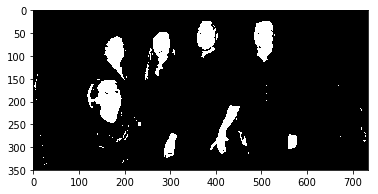

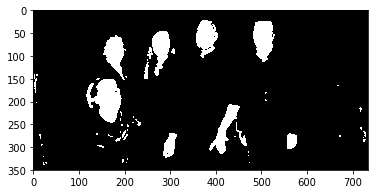

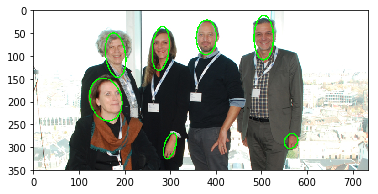

C:\Users\roby\Desktop\master\CV\TEMA4\input\p9.jpg


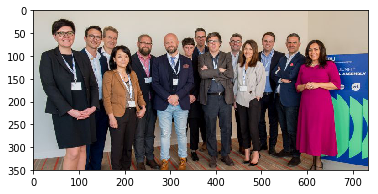

(350, 734, 3)


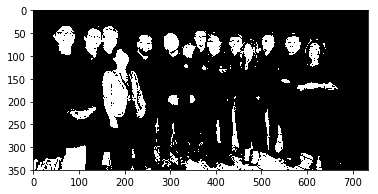

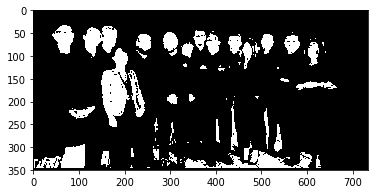

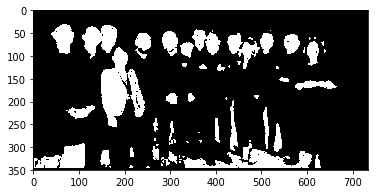

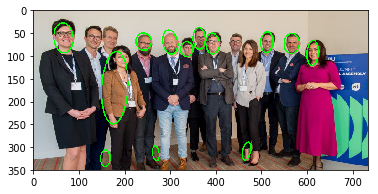

In [5]:
for name in files:
    print(path + "\\" + name)
    img = plt.imread(path + "\\" + name)
    plt.imshow(img)
    plt.show()
    
    width, height = img.shape[:2]
    print(img.shape)
    
    ############################3
    bin1 = np.zeros((width, height))
    bin2 = np.zeros((width, height))
    bin3 = np.zeros((width, height))
    #######################33

    (r,g,b) = cv2.split(img)
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    (H,S,V) = cv2.split(hsv)
    
    y  =  0.257 * r + 0.504 * g + 0.098 * b + 16;
    Cb =  0.148 * r - 0.291 * g + 0.439 * b + 128;
    Cr =  0.439 * r - 0.368 * g - 0.071 * b + 128;
    
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    (y,Cr,Cb) = cv2.split(YCrCb)

    bin1 = rule1(r,g,b) & rule2(y,Cb,Cr) & rule3(H,S,V)

    
    plt.imshow(bin1, cmap='gray')
    plt.show()
    
    mat = np.ones((5,5),np.uint8)

    cross = np.array([[0, 1, 0],
                      [1, 1 , 1],
                      [0, 1, 0]],dtype=np.uint8)
    
    edordedImg = erode(bin1, cross)
    edordedImg = erode(edordedImg, cross)
    plt.imshow(edordedImg, cmap='gray')
    plt.show()
    
    dilatedImg = dilate(edordedImg, np.ones((3,3),np.uint8))
    
    plt.imshow(dilatedImg, cmap='gray')
    plt.show()
    test = np.array(dilatedImg,np.uint8)
    
    
    dilatedImg = dilatedImg.astype(np.uint8)
    _,contours,hierarchy = cv2.findContours(dilatedImg, cv2.RETR_CCOMP , cv2.CHAIN_APPROX_SIMPLE)
    
    
    for cnt in contours:
        if(len(cnt) > 5):
            
            M = cv2.moments(cnt)
            ellipse = cv2.fitEllipse(cnt)
            (x,y),(MA,ma),angle = ellipse
            area = cv2.contourArea(cnt)
            

            ratio = (max(MA/2,ma/2)/min(MA/2,ma/2))

            if(((abs(180-angle) < 30) or (angle < 30))
               and (area > 300) and (ratio < 4) and (ratio > 1)):
                cv2.ellipse(img,ellipse,(0,255,0),2)

    plt.imshow(img)
    plt.show()
